In [20]:
import sys
sys.path.append('./../')

import xml.etree.ElementTree as ET
import numpy as np
import ikamoana as ika
import xarray as xr
import matplotlib.pyplot as plt
import os
import parcels

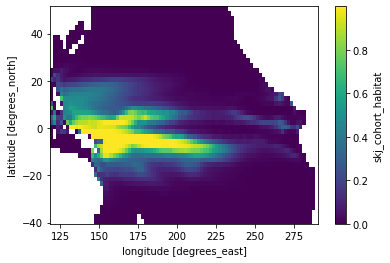

In [21]:
fh = xr.load_dataarray("./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
fh.mean(axis=0).plot()

In [23]:
ika_s = ika.IkaSim('./../data/ikamoana_config/IkaSim_Example.xml')
f_g = ika_s.generateForcing(from_habitat=fh, to_file=False)

 It will also add +1 to sigma_min. Cf. function documentation for more details.


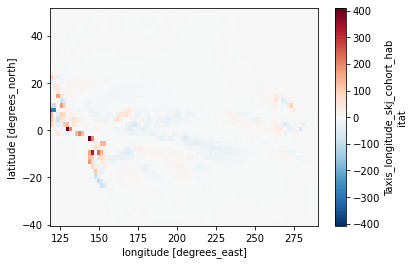

In [24]:
ika_s.forcing['Tx'].mean(axis=0).plot()

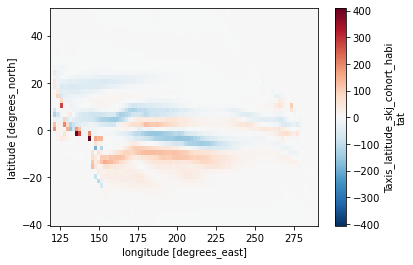

In [25]:
ika_s.forcing['Ty'].mean(axis=0).plot()

In [4]:
advection_x_ika = ika_s.forcing['Tx'] + ika_s.forcing['U']
advection_y_ika = ika_s.forcing['Ty'] + ika_s.forcing['V']
diffusion_ika = ika_s.forcing['Ky']

In [5]:
ika_s.forcing

<xarray.Dataset>
Dimensions:    (lon: 86, lat: 46, time: 5)
Coordinates:
  * lon        (lon) float64 119.5 121.5 123.5 125.5 ... 283.5 285.5 287.5 289.5
  * lat        (lat) float64 -39.5 -37.5 -35.5 -33.5 ... 44.5 46.5 48.5 50.5
  * time       (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2008-05-16
Data variables:
    H          (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    Kx         (time, lat, lon) float32 5.075e+03 5.042e+03 ... nan nan
    Ky         (time, lat, lon) float32 5.075e+03 5.042e+03 ... nan nan
    dKx_dx     (time, lat, lon) float32 -1.366e-07 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dKy_dy     (time, lat, lon) float32 -1.632e-05 -1.621e-05 ... 0.0 0.0
    Tx         (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Ty         (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    mortality  (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    U          (time, lat, lon) float32 17.6 21.13 24.55 24.68 ... nan nan nan
    V          (time, lat, lon) float32 9.115 9.577 12.14 12.3 ... nan nan nan

In [9]:
advection_x_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_x_20080115-20100715.nc")
advection_y_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_y_20080115-20100715.nc")
diffusion_sea = xr.load_dataarray("./../data/Inna/skj_cohort_diffusion_20080115-20100715.nc")

advection_x_sea = advection_x_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
advection_y_sea = advection_y_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
diffusion_sea = diffusion_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]

---

# ADVECTION X

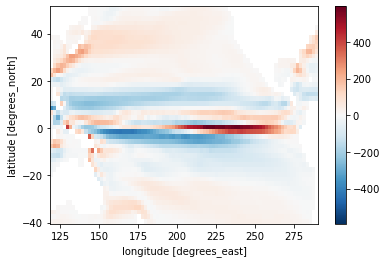

In [10]:
advection_x_ika.mean(axis=0).plot()

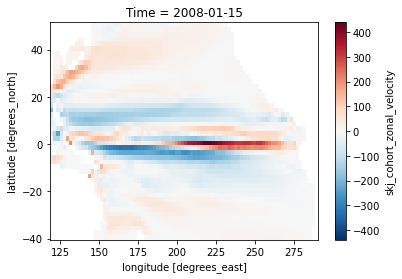

In [11]:
advection_x_sea.mean(axis=0).plot()

> Differences are probably due to SEAPODYM use of 3 layers instead of 1.

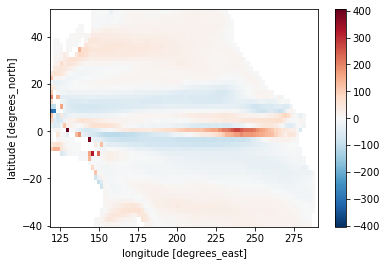

In [12]:
tmp_res = advection_x_ika - advection_x_sea.data
tmp_res.mean(axis=0).plot()

---
# ADVECTION Y

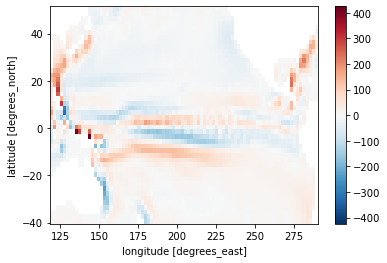

In [13]:
advection_y_ika.mean(axis=0).plot()

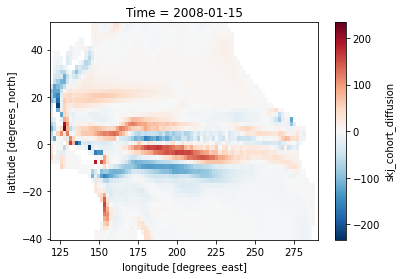

In [14]:
advection_y_sea.mean(axis=0).plot()

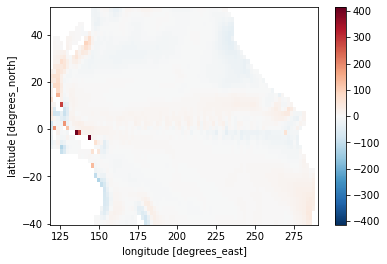

In [15]:
tmp_res = advection_y_ika + advection_y_sea.data
tmp_res.mean(axis=0).plot()

---
# DIFFUSION

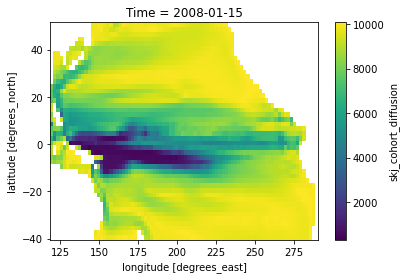

In [16]:
diffusion_sea.mean(axis=0).plot()

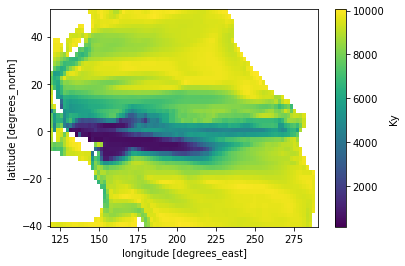

In [17]:
diffusion_ika.mean(axis=0).plot()

In [18]:
coef = (30*24*60*60/1852)

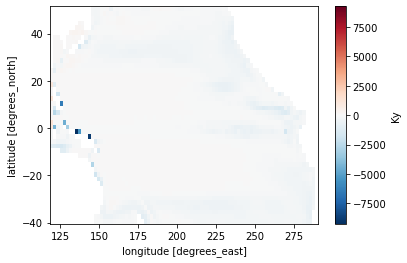

In [19]:
tmp_res = diffusion_ika- diffusion_sea.data
tmp_res.mean(axis=0).plot()

---

In [1]:
import sys
sys.path.append('./../')

import xml.etree.ElementTree as ET
import numpy as np
import ikamoana as ika
import xarray as xr
import matplotlib.pyplot as plt
import os
import parcels

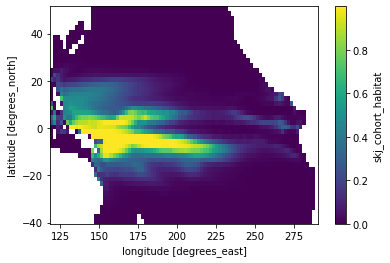

In [2]:
fh = xr.load_dataarray("./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
fh.mean(axis=0).plot()

In [3]:
ika_s = ika.IkaSim('./../data/ikamoana_config/IkaSim_Example.xml')
ika_s.forcing_gen.ikamoana_fields_structure.units="m_per_s"
ika_s.generateForcing(from_habitat=fh, to_file=True)

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [4]:
ika_s.createFieldSet(from_disk=True)

In [5]:
ika_s.start_distribution

In [6]:
N = 5000
ika_s.initialiseFishParticles(start=None,n_fish=N,pclass=ika.ikafish.ikafish.IkaFish)

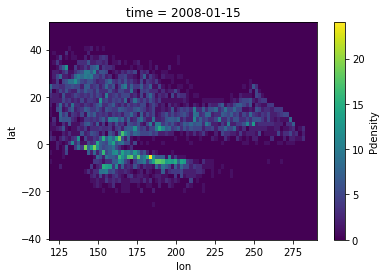

In [7]:
ika_s.fishDensity().plot()

In [8]:
#Run the behavioural kernels for two months
ika_s.runKernels(verbose=False)

LOGGGGGGGGGGGGg :
 Behaviours[0]+Behaviours[1]+Behaviours[2]+Behaviours[3]+Behaviours[4]+ [<parcels.kernel.kernelsoa.KernelSOA object at 0x7fb0b1d75df0>, <parcels.kernel.kernelsoa.KernelSOA object at 0x7fb0b1cf22e0>, <parcels.kernel.kernelsoa.KernelSOA object at 0x7fb0b1cbc340>, <parcels.kernel.kernelsoa.KernelSOA object at 0x7fb0b189ea60>, <parcels.kernel.kernelsoa.KernelSOA object at 0x7fb0b3937a00>]


INFO: Compiled ArrayIkaFishCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionReroll ==> /tmp/parcels-1000/libacd346570daeef821a5d81c740acfb68_0.so
/home/ash/anaconda3/envs/ikamoana/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


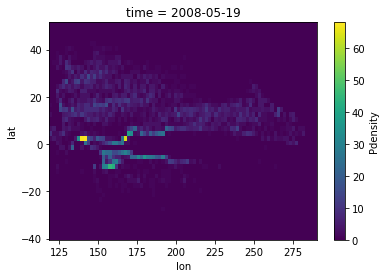

In [9]:
ika_s.fishDensity().plot()

In [10]:
ika_s.forcing_gen.ikamoana_fields_structure.timestep

2592000.0